<h1 align="center">
  <a href="https://portkey.ai">
    <img width="300" src="https://analyticsindiamag.com/wp-content/uploads/2023/08/Logo-on-white-background.png" alt="portkey">
  </a>
</h1>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1USSOBS3uWrpgZirIIAJmlyC9XHnFCVSQ?usp=sharing)

# Portkey + Groq

[Portkey](https://app.portkey.ai/) is the Control Panel for AI apps. With it's popular AI Gateway and Observability Suite, hundreds of teams ship reliable, cost-efficient, and fast apps.

With Portkey, you can

 - Connect to 150+ models through a unified API,
 - View 40+ metrics & logs for all requests,
 - Enable semantic cache to reduce latency & costs,
 - Implement automatic retries & fallbacks for failed requests,
 - Add custom tags to requests for better tracking and analysis and more.


## Use blazing fast Groq API with OpenAI Compatibility using Portkey!

Since Portkey is fully compatible with the OpenAI signature, you can connect to the Portkey AI Gateway through OpenAI Client.

- Set the `base_url` as `PORTKEY_GATEWAY_URL`
- Add `default_headers` to consume the headers needed by Portkey using the `createHeaders` helper method.

You will need Portkey and Groq API keys to run this notebook.

- Sign up for Portkey and generate your API key [here](https://app.portkey.ai/).
- Get your Groq API key [here](https://console.groq.com/keys)

In [ ]:
!pip install -qU portkey-ai openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.6/311.6 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 73.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.0 MB/s eta 0:00:00


## With OpenAI Client

In [ ]:
from openai import OpenAI
from portkey_ai import PORTKEY_GATEWAY_URL, createHeaders
from google.colab import userdata

client = OpenAI(
    api_key= userdata.get('GROQ_API_KEY'), ## replace it your Groq API key
    base_url=PORTKEY_GATEWAY_URL,
    default_headers=createHeaders(
        provider="groq",
        api_key= userdata.get('PORTKEY_API_KEY'), ## replace it your Portkey API key
    )
)

chat_complete = client.chat.completions.create(
    model="llama3-70b-8192",
    messages=[{"role": "user",
               "content": "What's the purpose of Generative AI?"}],
)

print(chat_complete.choices[0].message.content)

The primary purpose of generative AI is to create new, original, and often realistic data or content, such as images, videos, music, text, or speeches, that are similar to those created by humans. Generative AI models are designed to generate new data samples that are indistinguishable from real-world data, allowing for a wide range of applications and possibilities. Some of the main purposes of generative AI include:

1. **Data augmentation**: Generating new data to augment existing datasets, improving machine learning model performance, and reducing overfitting.
2. **Content creation**: Automating the creation of content, such as music, videos, or articles, that can be used for entertainment, education, or marketing purposes.
3. **Simulation and modeling**: Generating synthetic data to simulate real-world scenarios, allowing for experimentation, testing, and analysis in various fields, such as healthcare, finance, or climate modeling.
4. **Personalization**: Creating personalized con

## With Portkey Client

Note: You can safely store your Groq API key in [Portkey](https://app.portkey.ai/) and access models using virtual key


In [ ]:
from portkey_ai import Portkey

portkey = Portkey(
    api_key = userdata.get('PORTKEY_API_KEY'),   # replace with your Portkey API key
    virtual_key= "groq-431005",   # replace with your virtual key for Groq AI
)

In [ ]:
completion = portkey.chat.completions.create(
    messages= [{ "role": 'user', "content": 'Who are you?'}],
    model= 'llama3-70b-8192',
    max_tokens=250
)

print(completion)

{
    "id": "chatcmpl-8cec08e0-910e-4331-9c4b-f675d9923371",
    "choices": [
        {
            "finish_reason": "stop",
            "index": 0,
            "logprobs": null,
            "message": {
                "content": "I am LLaMA, an AI assistant developed by Meta AI that can understand and respond to human input in a conversational manner. I'm not a human, but a computer program designed to simulate conversation and answer questions to the best of my knowledge. I can discuss a wide range of topics, from science and history to entertainment and culture. I can even generate creative content, such as stories or poems.\n\nMy primary function is to assist and provide helpful responses to your queries. I'm constantly learning and improving my responses based on the interactions I have with users like you, so please bear with me if I make any mistakes.\n\nFeel free to ask me anything, and I'll do my best to provide a helpful and accurate response!",
                "role": "assi

## Advanced Routing - Load Balancing

With load balancing, you can distribute load effectively across multiple API keys or providers based on custom weights to ensure high availability and optimal performance.

Let's take an example where we might want to split traffic between Groq's `llama-3-70b` and OpenAI's `gpt-3.5` giving a weightage of 70-30.

The gateway configuration for this would look like the following:

In [ ]:
config = {
  "strategy": {
      "mode": "loadbalance",
  },
  "targets": [
    {
      "virtual_key": "groq-431005", # Groq virtual key
      "override_params": {"model": "llama3-70b-8192"},
      "weight": 0.7
    },
    {
      "virtual_key": "gpt3-8070a6", # OpenAI virtual key
      "override_params": {"model": "gpt-3.5-turbo-0125"},
      "weight": 0.3

    }
  ]
}

In [ ]:
from openai import OpenAI
from portkey_ai import PORTKEY_GATEWAY_URL, createHeaders
from google.colab import userdata

client = OpenAI(
    api_key="X",
    base_url=PORTKEY_GATEWAY_URL,
    default_headers=createHeaders(
        api_key=userdata.get("PORTKEY_API_KEY"),
        config=config
    )
)

chat_complete = client.chat.completions.create(
    model="X",
    messages=[{"role": "user",
               "content": "Just say hi!"}],
)

print(chat_complete.model)
print(chat_complete.choices[0].message.content)

gpt-3.5-turbo-0125
Hi! How can I assist you today?


## Observability with Portkey

By routing requests through Portkey you can track a number of metrics like - tokens used, latency, cost, etc.

Here's a screenshot of the dashboard you get with Portkey!

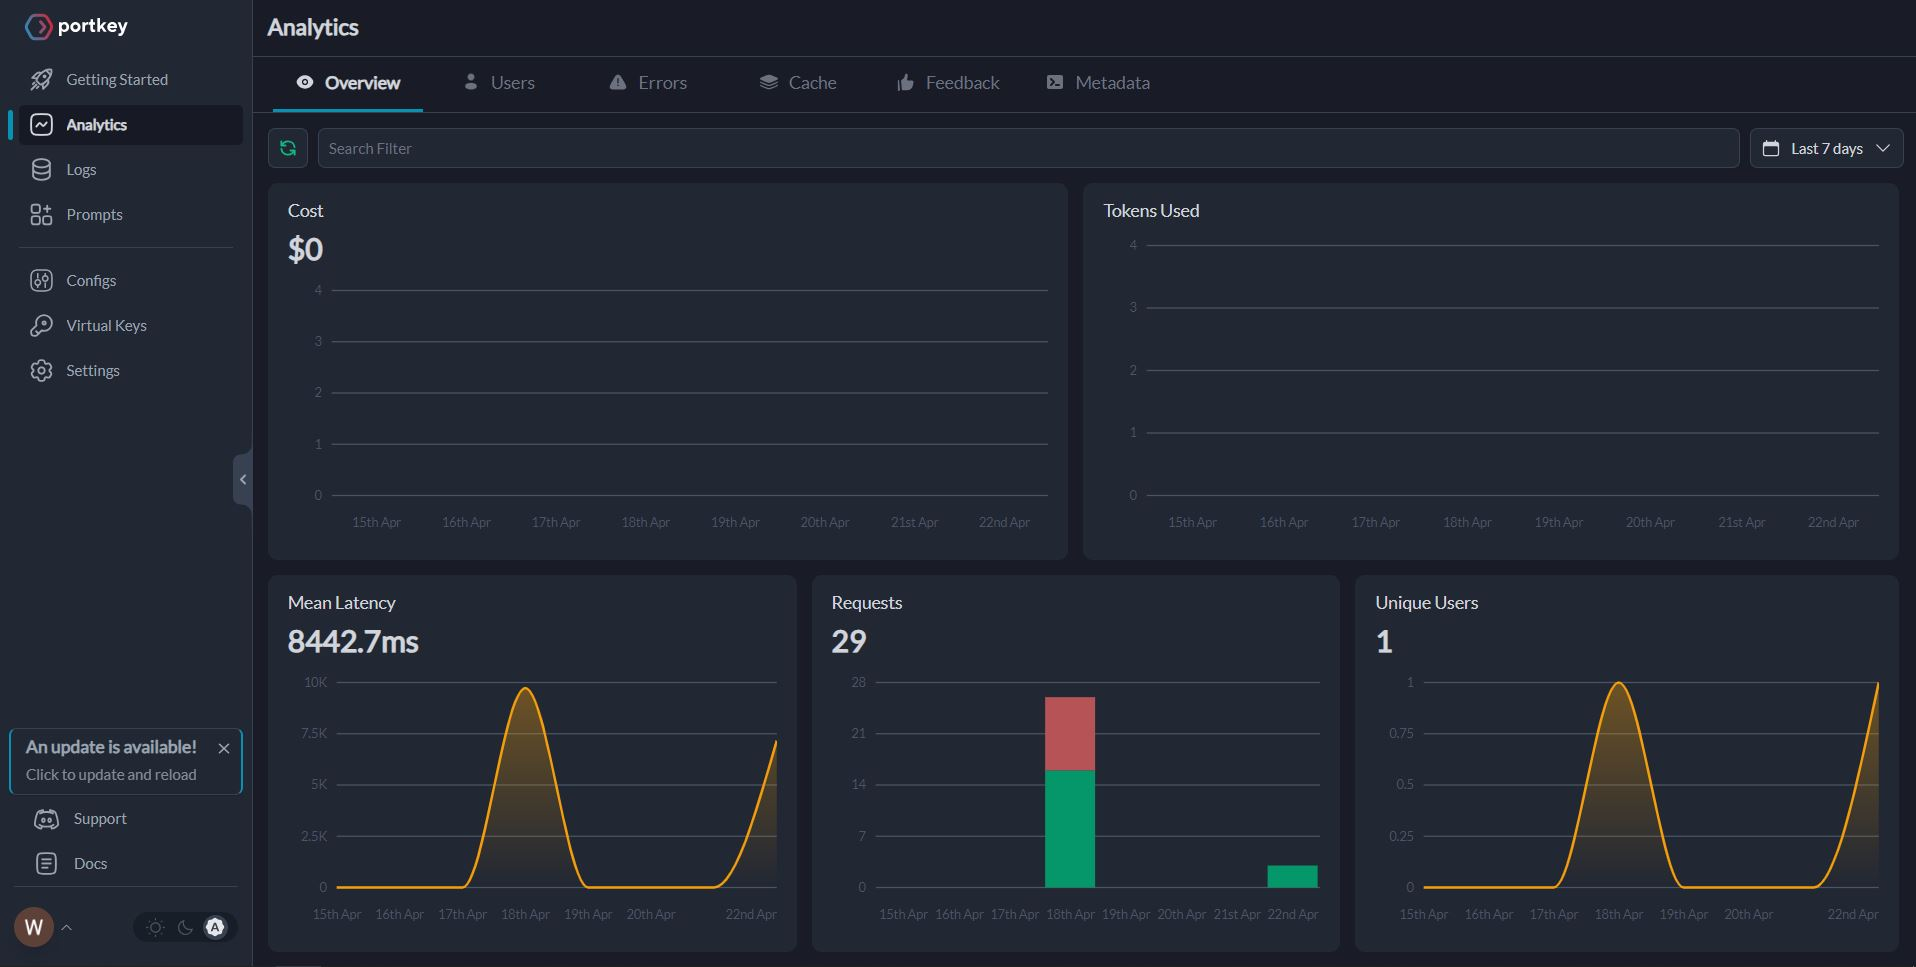